# import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/Dell/Downloads/customer-segmentation-dataset/customer-segmentation-dataset/Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# EDA

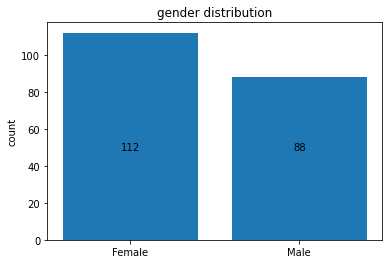

In [3]:
gender_count = data["Gender"].value_counts()

female_count = gender_count["Female"]
male_count = gender_count["Male"]

fig, ax = plt.subplots()
ax.bar(['Female', 'Male'], [female_count, male_count])

ax.text(0,50, f"{female_count}", ha="center", va="center")
ax.text(1,50, f"{male_count}", ha="center", va="center")

ax.set_title("gender distribution")
ax.set_ylabel('count')
plt.show()

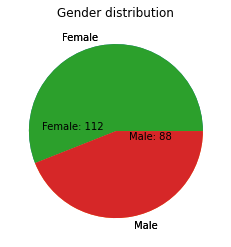

In [4]:
female_count = gender_count["Female"]
male_count = gender_count["Male"]
fig,ax = plt.subplots()
ax.pie([female_count, male_count], labels=['Female', 'Male'])
plt.pie(gender_count.values , labels = gender_count.index)

ax.text(-0.5,0,f"Female: {female_count}", ha="center",va="bottom")
ax.text(0.4,0,f"Male: {male_count}",ha="center",va="top")


plt.title("Gender distribution")
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

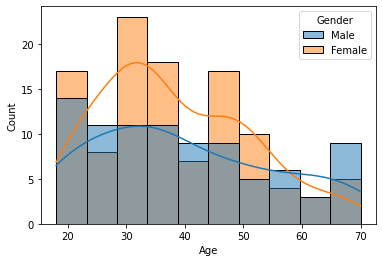

In [5]:
 sns.histplot(data=data,x='Age',hue='Gender', kde=True,bins=10)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

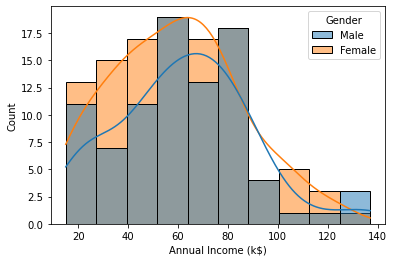

In [7]:
sns.histplot(data=data, x="Annual Income (k$)", bins=10,kde=True,hue='Gender')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

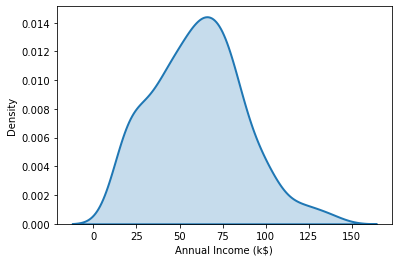

In [12]:
sns.kdeplot(data=data, x="Annual Income (k$)", linewidth = 2, fill=True)

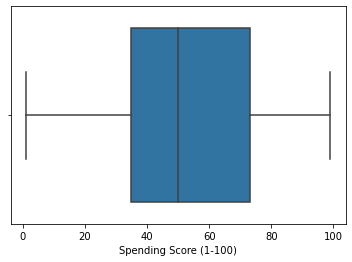

In [16]:
sns.boxplot(x='Spending Score (1-100)', data=data)
plt.show()

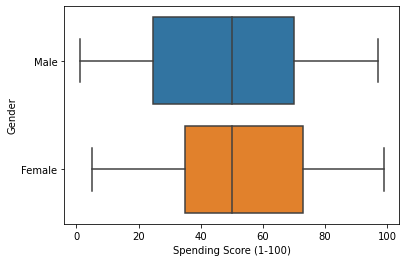

In [18]:
sns.boxplot(x='Spending Score (1-100)', y='Gender', data=data)
plt.show()

# optimal no of clusters

E:\anaconda_install\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


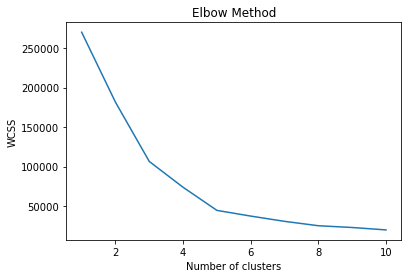

In [19]:
from sklearn.cluster import KMeans
X = data.iloc[:, [3, 4]].values
wcss = []
for i in range(1, 11):
 kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
 kmeans.fit(X)
 wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10) 
y_kmeans = kmeans.fit_predict(X)

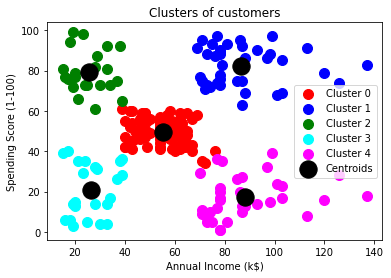

In [29]:
import matplotlib.pyplot as plt

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 3')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
